In [1]:
import matplotlib.pyplot as plt
import numpy as np
import skimage

from src.data.kitti.dataset import KITTIDataset
from src.data.kitti.camera import Camera

#from raw_data.camera import Camera
#from raw_data.kitti_dataset import KITTIDataset
#from raw_data.utils import cloud2depth

In [2]:
data = KITTIDataset('test', center_crop=False, from_velodyne=False, project=True)
print(len(data))

652


Each item of a `KITTIDataset` object is a tuple of the following:
 - Image as a `numpy` array of dtype `uint8` and shape $(H, W, 3)$ (the actual values can vary across images)
 - Camera object describing the camera intrinsics and extrinsics parameters under a pinhole model through the attributes:
    - `K`: `numpy` array of shape $(3, 3)$ of dtype `float32`
    - `R`, `t`: `numpy` arrays of shape $(3, 3)$ and $(3, 1)$ describing the transformation between the world reference system and the camera reference system (i.e. $ \, x_{camera} = \mathbf{R} \, x_{world} \, + \, \mathbf{t} \,$ with $x_{camera}$ expressed in projective coordinates). They are both of dtype `float32`
    - `shape`: tuple of `int` containing the shape of the image, i.e. $(H, W)$
 - Depth map as a `numpy` array of dtype `float32` and shape $(H, W)$. 

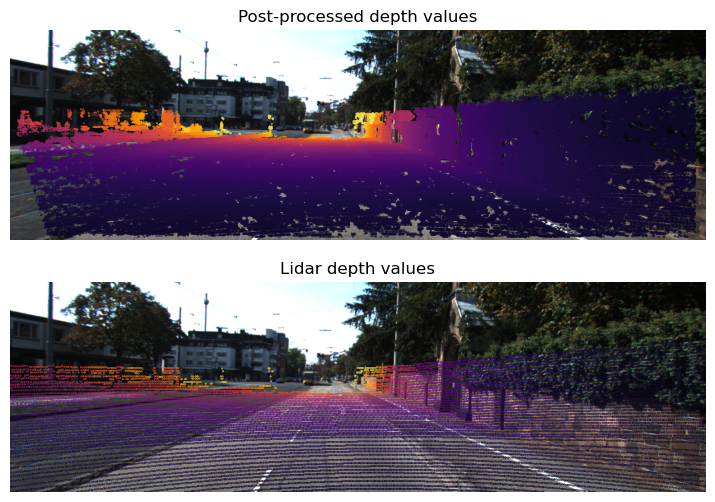

In [4]:
idx = 2

image: np.ndarray
camera: Camera
point_cloud: np.ndarray
image, camera, gt_depth, velo_depth = data[idx]

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(3*4, 3*2))

valid = (gt_depth > 0)
z = gt_depth[valid]
y, x = np.where(valid)

ax1.set_title("Post-processed depth values")
ax1.axis('off')
ax1.imshow(image)
ax1.scatter(x, y, c=z, cmap='inferno', s=0.1, vmin=data.min_depth, vmax=data.max_depth)

valid = (velo_depth > 0)
z = velo_depth[valid]
y, x = np.where(valid)

ax2.set_title("Lidar depth values")
ax2.axis('off')
ax2.imshow(image)
ax2.scatter(x, y, c=z, cmap='inferno', s=0.1, vmin=data.min_depth, vmax=data.max_depth)
